In [ ]:
#Authors: Bina Mukuyamba and S'thabiso Lushaba
#Date:23/02/23
#EEE4120F 2023 Practical 1

#installing all necessary packages
#commented out when done
#==using Pkg
function installFunc()
    Pkg.add("WAV")
    Pkg.add("Plots")
    Pkg.add("TickTock")
    Pkg.add("Statistics")
    println("------Packages Installed---------")
    println(Pkg.status())
    end
installFunc()
==#

 
    

1.2.1 Measuring Execution Time of rand()


In [1]:
#importing the packages and generating the noise wave
using WAV
using Plots
using TickTock
using Statistics
whiteNoise = (rand(48000)*2).-1
WAV.wavwrite(whiteNoise, "whiteNoise.wav", Fs=4800) #sample freq is 4800Hz

1.2.2 White Noise Generator Script


In [15]:
#==
function createwhiten(time)
    noise_array=[]
    fs=48000
    factor=time/10
    N=trunc(Int,factor)*fs
    noise_array=ones(N)
    for i in 1:N
        A_noise=(rand()*2 ) - 1
        noise_array[i]=A_noise
        i+=1
    end
    sampleSize=size(noise_array)
    println("Number of samples: $sampleSize ")
    return noise_array
end

whiten = createwhiten(1000) #this will create N seconds of white noise
WAV.wavwrite(whiten, "white_noise_sound2.wav", Fs=4800)
==#


In [2]:
#function to generate whiteNoise
function createwhiten(time)
    noise_array2=Array{Float64}(undef,1)
    fs=48000
    factor2=time/10
    N2=trunc(Int,factor2)*fs
    popfirst!(noise_array2)
    for i in 1:N2
        A_noise2=(rand()*2 ) - 1
        push!(noise_array2,A_noise2)
        i+=1
    end
    sampleSize2=size(noise_array2)
    println("Number of samples: $sampleSize2 ")
    return noise_array2
end

whiten = createwhiten(1000) #this will create N seconds of white noise
WAV.wavwrite(whiten, "white_noise_sound2.wav", Fs=4800)


Number of samples: (4800000,) 


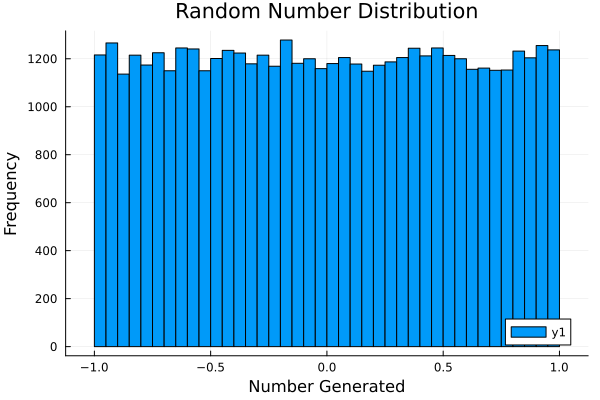

stdin> 


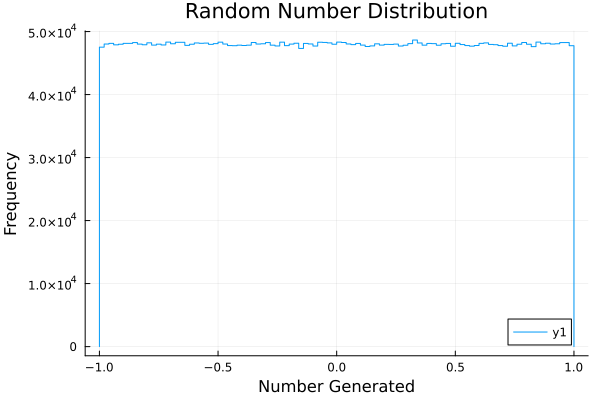

stdin> 


""

In [3]:
#plotting histograms to check correctness
Plots.gr();

h1 = Plots.histogram(whiteNoise)
xlabel!("Number Generated")
ylabel!("Frequency")
title!("Random Number Distribution")
Plots.display(h1)
readline() #this will stop the program at this point till you press enter

h = Plots.histogram(whiten)
xlabel!("Number Generated")
ylabel!("Frequency")
title!("Random Number Distribution")
Plots.display(h)

readline() #this will stop the program at this point till you press enter


1.2.4 Timing Execution

In [4]:
#OPTIMIZED VERSION
TickTock.tick()
whiteNoise = (rand(48000)*2).-1 #vary by multiplying by multiples of 10
TickTock.tock()
#size(whitenoise)

[ Info:  started timer at: 2023-02-23T14:55:41.012
[ Info:            1.1023776s: 1 second, 102 milliseconds


In [5]:
#OUR VERSION
TickTock.tick()
whiten = createwhiten(1000) #this will create N seconds of white noise
TickTock.tock()


Number of samples: (4800000,) 


[ Info:  started timer at: 2023-02-23T14:55:44.702
[ Info:            0.0915317s: 91 milliseconds


1.2.5 Implementing Pearson’s Correlation

In [10]:
#correlation function
#the arrays have to be the same size
function corr(x,y)
if length(x)!=length(y)
        throw(ArgumentError("Arrays must have the same length."))
        else
        xbar=mean(x)
        ybar=mean(y)
        arrLen=length(x)
        #==sum1=0.0
        sum2=0.0
        for i in 1:arrLen
            sum1=sum1+(x[i]-xbar)*(y[i]-ybar)
            sum2=sum2+sqrt(abs2(x[i]-xbar)*abs2(y[i]-ybar))
            end
        r=sum1/sum2==#
        sum_of_products=sum((x[i]-xbar)*(y[i]-ybar) for i in 1:arrLen)
        sum_of_xsquares=sum((x[i]-xbar)^2 for i in 1:arrLen)
        sum_of_ysquares=sum((y[i]-ybar)^2 for i in 1:arrLen)
        r=sum_of_products/sqrt(sum_of_xsquares*sum_of_ysquares)
    end
                return r
end
corr([1,2],[-1,-2])


-1.0

1.2.6 Comparing Your Correlation Function to the Statistics Package’s Correlation Function


In [7]:
#PART 1
whiten = createwhiten(1000); #vary the sample size, use corr and stats.cor against itself


Number of samples: (4800000,) 


In [8]:
#optimized code
TickTock.tick()
Statistics.cor(whiten,whiten)
TickTock.tock()


[ Info:  started timer at: 2023-02-23T14:56:08.841
[ Info:            0.0616924s: 61 milliseconds


In [9]:
#our code(non-optimized)
TickTock.tick()
corr(whiten,whiten)
TickTock.tock()


[ Info:  started timer at: 2023-02-23T14:56:10.782
[ Info:            0.1265759s: 126 milliseconds


In [235]:
#PART 2
whiten = createwhiten(1000); #vary the sample size, use corr and stats.cor against itself
whiteNoise = (rand(4800000)*2).-1; #vary by multiplying by 10, 2400000

Number of samples: (4800000,) 


In [244]:
#optimized code
TickTock.tick()
Statistics.cor(whiten,whiteNoise)
TickTock.tock()
Statistics.cor(whiten,whiteNoise)

[ Info:  started timer at: 2023-02-21T20:49:10.643
[ Info:            0.0124981s: 12 milliseconds


-0.00031895015542040335

In [252]:
#our code(non-optimized)
TickTock.tick()
corr(whiten,whiteNoise)
TickTock.tock()
corr(whiten,whiteNoise)

[ Info:  started timer at: 2023-02-21T20:50:44.537
[ Info:            0.0339803s: 33 milliseconds


-0.00031895015542036617

1.2.7 Correlation of Shifted Signals

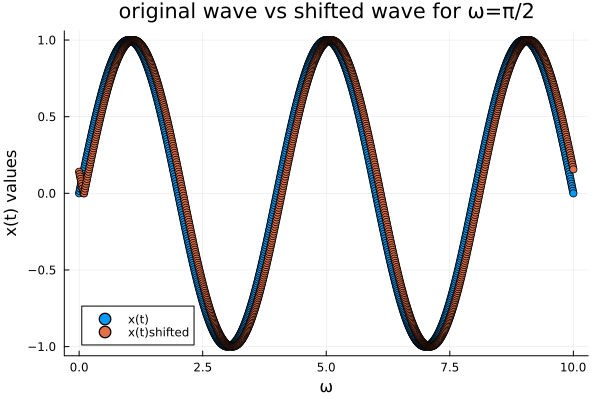

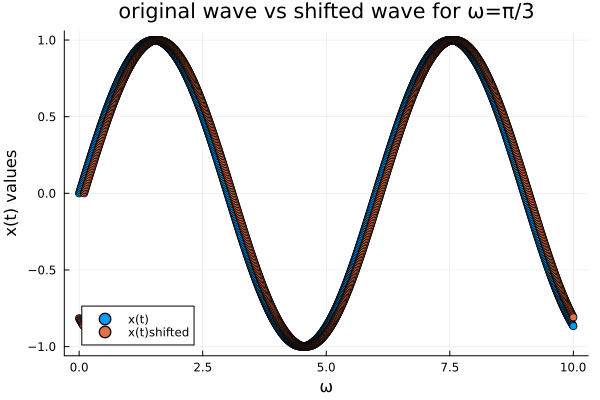

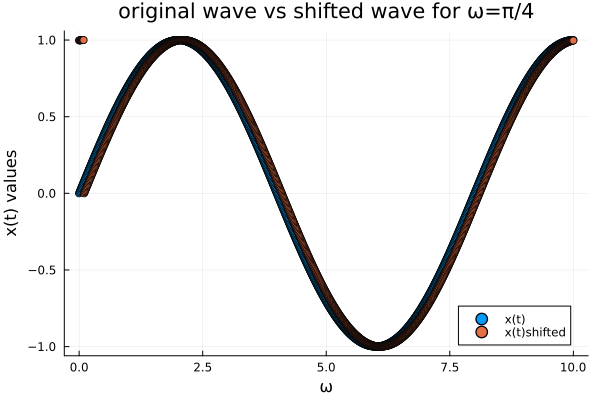

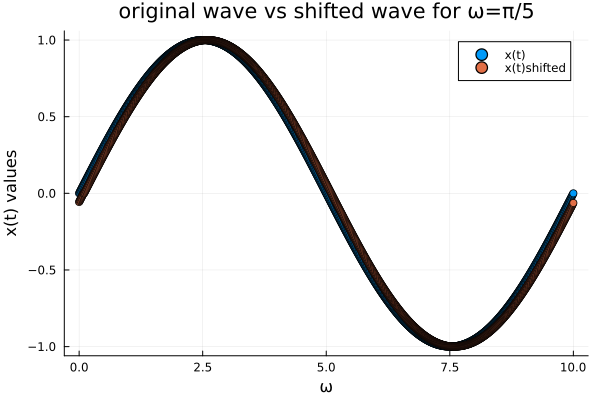

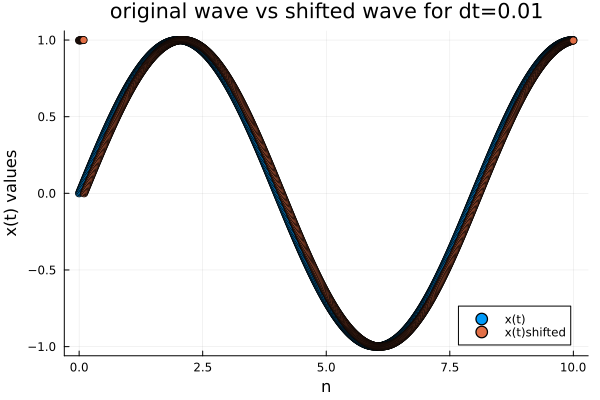

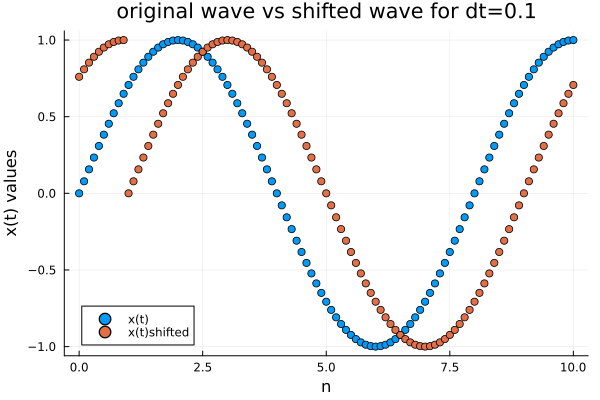

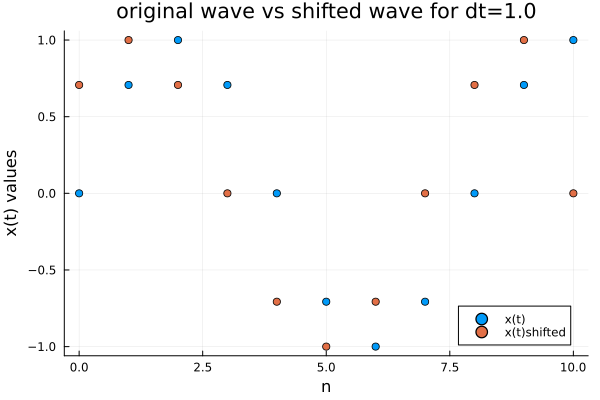

In [21]:
#Correlation of shifted signals

#constant sample size varied frequencies
ω=[pi/2,pi/3,pi/4,pi/5]; #range of freq π/6 < ω < π/2
nVal=0:0.01:10; #fixed sample size
results=ones(length(ω)); #store correlation results for each sin wave

for w in 1:length(ω)
    freq=ω[w]; #frequency
    x1=sin.(freq*nVal);
    x2=circshift(x1,10); #shift by 10
    results[w]=cor(x1,x2); #store result of correlation
    fig=scatter(nVal,[x1,x2],labels=["x(t)" "x(t)shifted"])
    title!("original wave vs shifted wave for ω=π/$(w+1)")
    xlabel!("ω");
	ylabel!("x(t) values")
    display(fig)
end
#store results in file
using DelimitedFiles
f = open("VaryFreq.txt", "w")
writedlm(f, results,',')
close(f)

#Varying sample size at constant frequency
ω0=pi/4
dt=[0.001,0.01,0.1,1];#step sizes
results2=ones(length(dt));
for n in 1:length(dt)
    step=dt[n];
    nVal=0:step:10
    x3=sin.(ω0*nVal);
    x4=circshift(x3,10);
    results2[n]=cor(x3,x4);
    fig=scatter(nVal,[x3,x4],labels=["x(t)" "x(t)shifted"])
    title!("original wave vs shifted wave for dt=$(dt[n])")
    xlabel!("n");
	ylabel!("x(t) values")
    display(fig)
end
f = open("VarySamp.txt", "w")
writedlm(f, results2,',')
close(f)